<a href="https://colab.research.google.com/github/Tim-g-t/1skills-review-pull-requests/blob/main/tgt2116_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Uni : Fill Here. (Also change Uni in the title of your notebook)
# Your Full name : Fill Here
# Link to your Public Github repository with Final report  : Fill here


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [4]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [8]:
# Load data
import pandas as pd

X_train = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('/content/world_happiness_competition_data/X_test.csv')  # Load test features to predict on
y_train = pd.read_csv('/content/world_happiness_competition_data/y_train.csv')  # Load y_train (true labels)
y_test = pd.read_csv('/content/world_happiness_competition_data/y_test.csv')    # Load y_test (true labels)

y_train_labels = y_train.idxmax(axis=1)  # Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1)    # Complete in a similar manner as above

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:



**Answer:**

The line y_train_labels = y_train.idxmax(axis=1) converts the one-hot encoded labels in y_train into a single column of class labels. It does this by finding the column name (class label) with the maximum value (which is 1 in one-hot encoding) for each row. So, y_train_labels is a Series containing the class label for each sample.

The difference between y_train_labels and y_train is that y_train is a DataFrame with multiple columns representing each class in a one-hot encoded format, whereas y_train_labels is a Series containing the actual class labels as strings.

##  Add new data

In [9]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [11]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.
X_train = X_train.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')
X_test = X_test.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')


In [19]:
X_train.head(1)


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,...,mean_years_of_schooling_x,gni_x,country_name_y,population_y,population_below_poverty_line_y,hdi_y,life_expectancy_y,expected_years_of_schooling_y,mean_years_of_schooling_y,gni_y
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,...,11.736418,22589.17355,Latvia,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [20]:
print(X_train.dtypes)

Country or region                   object
GDP per capita                     float64
Social support                     float64
Healthy life expectancy            float64
Freedom to make life choices       float64
Generosity                         float64
Perceptions of corruption          float64
name                                object
region                              object
sub-region                          object
Terrorist_attacks                  float64
country_name_x                      object
population_x                       float64
population_below_poverty_line_x    float64
hdi_x                              float64
life_expectancy_x                  float64
expected_years_of_schooling_x      float64
mean_years_of_schooling_x          float64
gni_x                              float64
country_name_y                      object
population_y                       float64
population_below_poverty_line_y    float64
hdi_y                              float64
life_expect

Describe what you see above?

In [ ]:
## Your answer:

**Answer:**

The output displays the data types of each column in X_train. We can see which columns are of type object (usually strings or categorical data) and which are numerical (float64 or int64). This information helps identify which features need encoding and which can be used directly for modeling.

Find out the number and percentage of missing values in the table per column

In [21]:
missing_values = X_train.isnull().sum()
missing_percentage = (missing_values / X_train.shape[0]) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)


                                 Missing Values  Percentage
Country or region                             0    0.000000
GDP per capita                                0    0.000000
Social support                                0    0.000000
Healthy life expectancy                       0    0.000000
Freedom to make life choices                  0    0.000000
Generosity                                    0    0.000000
Perceptions of corruption                     0    0.000000
name                                          0    0.000000
region                                        0    0.000000
sub-region                                    0    0.000000
Terrorist_attacks                             0    0.000000
country_name_x                                6    8.695652
population_x                                  6    8.695652
population_below_poverty_line_x              11   15.942029
hdi_x                                         6    8.695652
life_expectancy_x                       

Plot the frequency distribution / histogram of some of the numerical features that you think are important

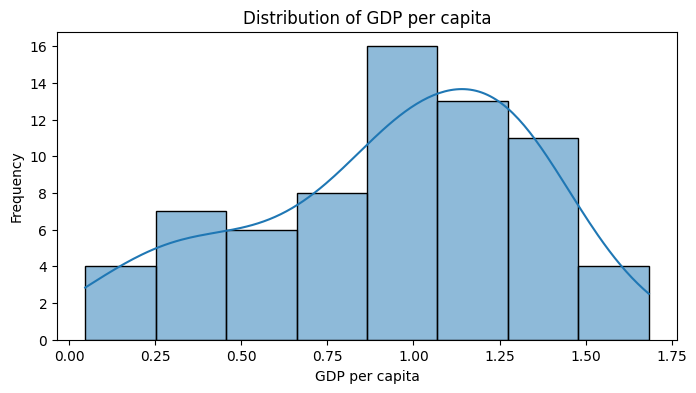

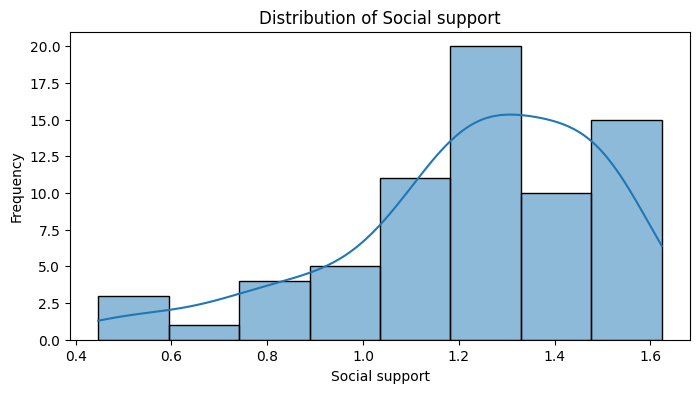

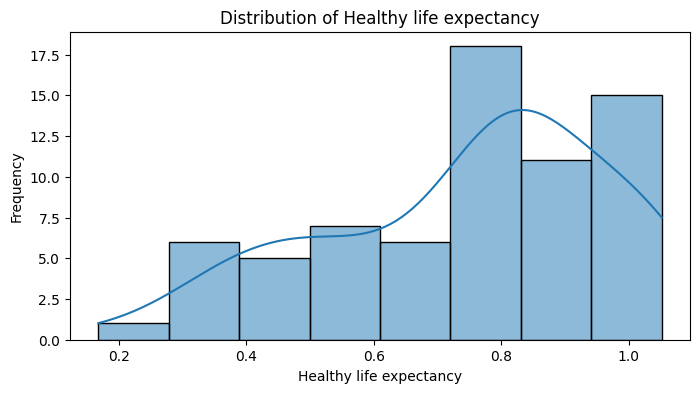

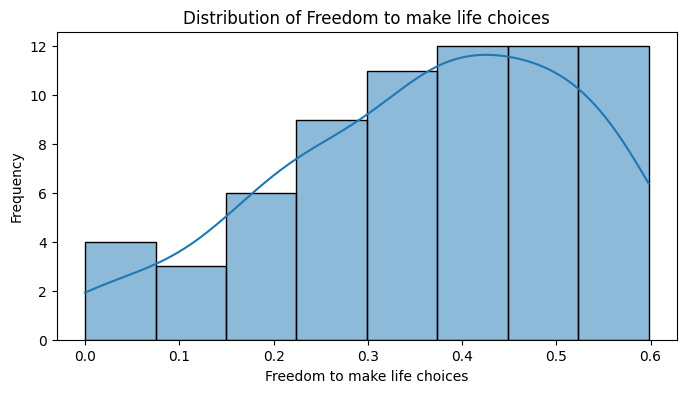

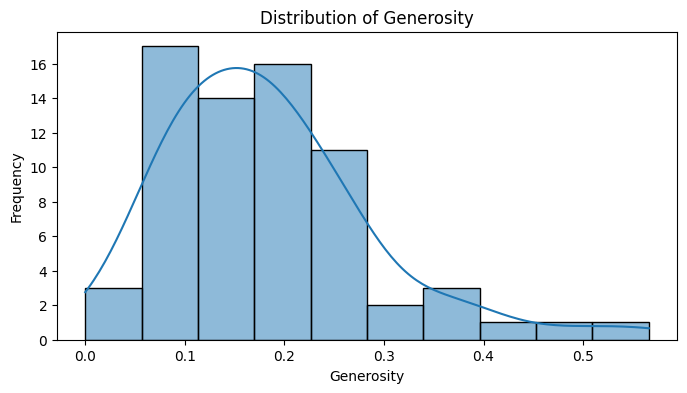

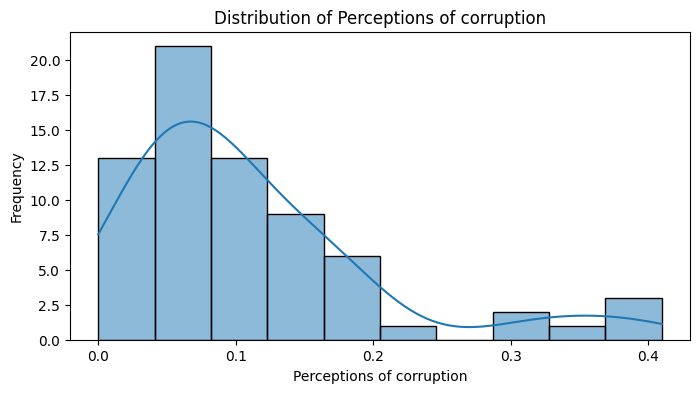

KeyError: 'population'

<Figure size 800x400 with 0 Axes>

In [16]:
# Your plotting code here:

Plot the categorical variables and their distribution

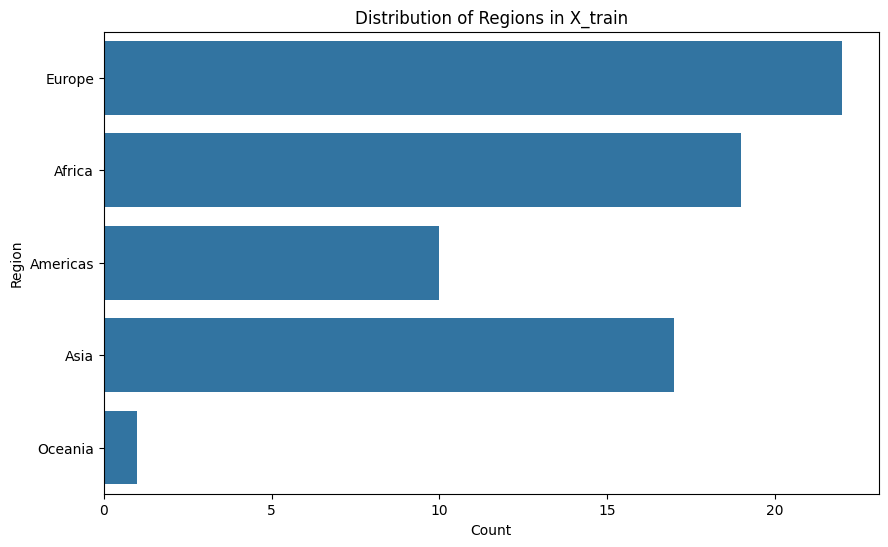

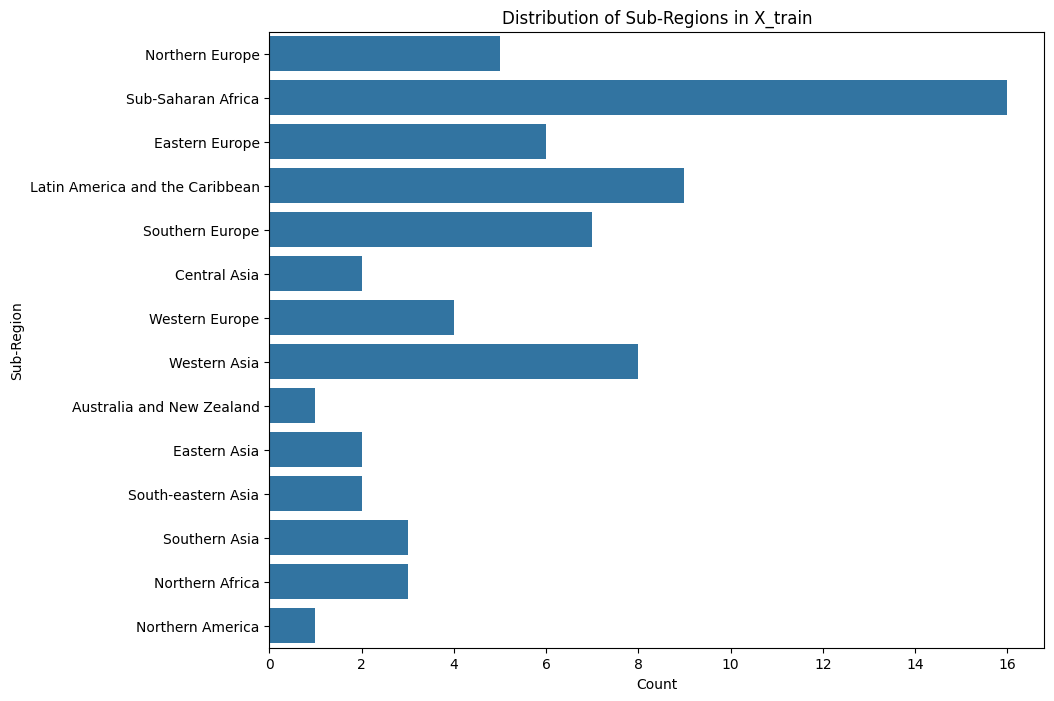

In [17]:
# Plotting the distribution of 'region'
plt.figure(figsize=(10, 6))
sns.countplot(y='region', data=X_train)
plt.title('Distribution of Regions in X_train')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Plotting the distribution of 'sub-region'
plt.figure(figsize=(10, 8))
sns.countplot(y='sub-region', data=X_train)
plt.title('Distribution of Sub-Regions in X_train')
plt.xlabel('Count')
plt.ylabel('Sub-Region')
plt.show()


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [18]:
# Correlation matrix for numerical features
corr_matrix = X_train[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between numerical features and the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y_train_labels, y=X_train[col])
    plt.title(f'{col} vs Happiness Category')
    plt.xlabel('Happiness Category')
    plt.ylabel(col)
    plt.show()


KeyError: "['population', 'population_below_poverty_line', 'hdi', 'life_expectancy', 'expected_years_of_schooling', 'mean_years_of_schooling', 'gni'] not in index"

Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = ## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  ## Fill here )),
    ('onehot', OneHotEncoder(handle_unknown= ## Fill here  ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer :

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

##3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = ## Define a Random Forest Model here, fit it, and score it

# Your cell should have a score between 0-1 as output

## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = ## Make a new model with changed parameters to improve the score

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = # Predict

## Write code to show model performance by comparing prediction_labels with true labels


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
#Submit Model 3:

#-- Generate predicted values


## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = ## Read documentations of imported models and fit them.

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

# 6. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=#count features in input data

keras_model = ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked